<a href="https://colab.research.google.com/github/cm609/ventilador_fuzzy/blob/main/ventilador_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# fazer um ventilador usando lógica fuzzy, para aumentar eu diminuir a velocidade do ventilador
!pip install scikit-fuzzy
!pip install --upgrade networkx
!pip install networkx==2.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=02c0b49b158acc7d7db2a66306e47e6ef91930003f744897f5147aa3140b53ba
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.8 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [2]:
#numpy biblioteca que se usa para processar grande quantidade de numeros
import numpy as np
#biblioteca fuzzy para poder utilizar a logica nebulosa
import skfuzzy as fuzz
from skfuzzy import control as ctrl #para controle de regras estipuladas pela situação/problema



In [3]:
## criando variaveis para avaliar a temperatura para que o ventilador possa regular sua velocidade chamamos de função de pertinencia.
temperatura = ctrl.Antecedent(np.arange(0, 110, 1), 'temperatura')
humidade = ctrl.Antecedent(np.arange(0, 110, 1), 'humidade')
velocidade = ctrl.Antecedent(np.arange(0, 100, 1), 'velocidade') #metodo de defuzzificação = 'centroid'

#metodo de defuzificação
#ajustando grafico-->
#Para o np.arange nós conseguimos criar conjunto de dados em sequência sem que você perca tempo tendo que escrever esse conjunto.

velocidade = ctrl.Consequent(np.arange(0, 110, 1), 'velocidade', defuzzify_method='mom')

#cria um mapeamento entre valores nitidos e difusos
#usando uma função de pertinencia padrão, pois o fuzzy trabalha (triangulo)
#temperatura.automf(names=['frio', 'normal', 'quente'])

temperatura['frio'] = fuzz.trimf(temperatura.universe, [0,25,50])
temperatura['normal'] = fuzz.trimf(temperatura.universe, [40,57,78])
temperatura['quente'] = fuzz.trimf(temperatura.universe, [68,83,100])


humidade['seca'] = fuzz.trimf(temperatura.universe, [0,25,50])
humidade['moderado'] = fuzz.trimf(temperatura.universe, [40,57,78])
humidade['molhado'] = fuzz.trimf(temperatura.universe, [68,83,100])

#usando uma função de pertinencia padrão, pois o fuzzy trabalha (triangulo)
#onde estipula o que aparecerá no grafico
# saida velocidade.automf(names=['devagar', 'media', 'rapido'])
velocidade['devagar'] = fuzz.trimf(velocidade.universe, [0,25,50])
velocidade['media'] = fuzz.trimf(velocidade.universe, [40,57,78])
velocidade['rapido'] = fuzz.trimf(velocidade.universe, [68,83,100])


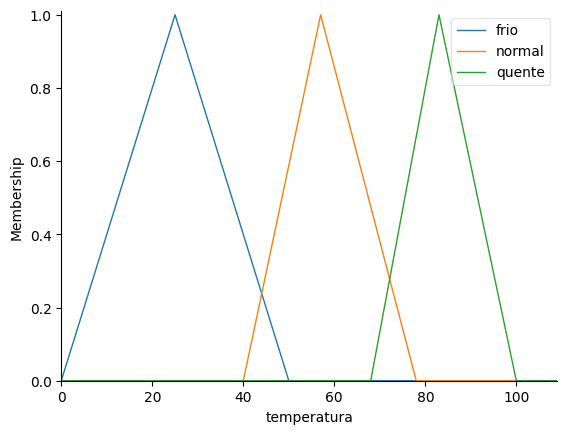

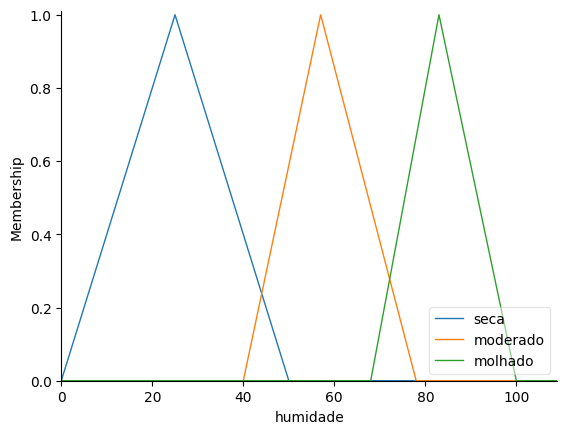

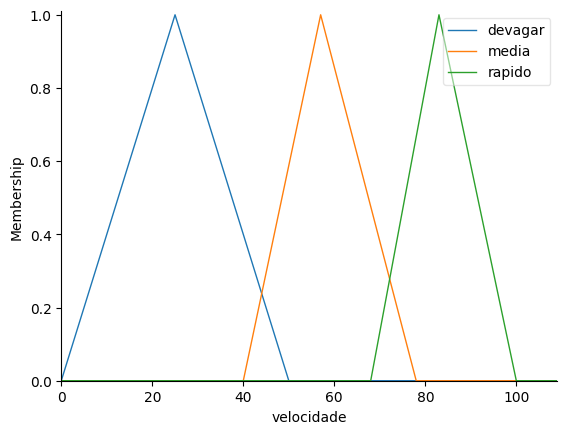

In [4]:
temperatura.view()
humidade.view()
velocidade.view()


In [5]:
#criando as regras que definiram o controle da velocidade do ventilador
# ctrl função que usa a biblioteca 'control' pra realizar o controle das regras nebulosas
rule1 = ctrl.Rule(temperatura['frio'] | humidade['molhado'], velocidade['devagar'])
rule2 = ctrl.Rule(temperatura['frio'] & humidade['moderado'], velocidade['devagar'])
rule3 = ctrl.Rule(temperatura['frio'] & humidade['seca'], velocidade['media'])

rule4 = ctrl.Rule(temperatura['normal'] & humidade['moderado'], velocidade['media'])
rule5 = ctrl.Rule(temperatura['normal'] & humidade['molhado'], velocidade['devagar'])
rule6 = ctrl.Rule(temperatura['normal'] & humidade['seca'], velocidade['rapido'])

rule7 = ctrl.Rule(temperatura['quente'] & humidade['molhado'], velocidade['media'])
rule8 = ctrl.Rule(temperatura['quente'] & humidade['seca'], velocidade['rapido'])
rule9 = ctrl.Rule(temperatura['quente'] & humidade['seca'], velocidade['rapido'])



In [6]:
# usaremos a varialvel velocidade_ctrl para acessar as regras e usar elas de acordo com a entrada de temperatura
#velocidade_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])
velocidade_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,rule6,rule7,rule8,rule9])

In [7]:
velocidade_simulador = ctrl.ControlSystemSimulation(velocidade_ctrl)

Ventilador está na velocidade =  54.5 



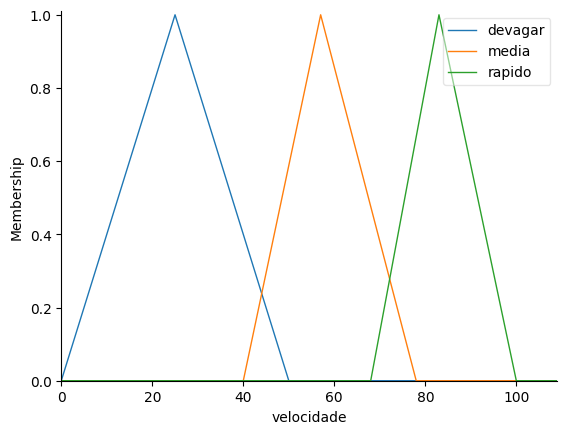

In [18]:
#fazendo a inserção dos valores
velocidade_simulador.input['temperatura'] = 100
velocidade_simulador.input['humidade'] = 100
#=========================================
# Computando o resultado que irá devolver
velocidade_simulador.compute()
#=========================================

#realizando a saida da velocidade do ventilador
print("Ventilador está na velocidade = ",velocidade_simulador.output['velocidade'],"\n")
#visualizar a função gorjeta simulator
velocidade.view(sim=velocidade_simulador)
